In [1]:
##loading librabries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
##READ CSV
employees_data = pd.read_csv("data.csv")

In [3]:
employees_data.head()

,employee_id,name,age,department,salary,country,years_of_experience,performance_score
0,1,Employee 1,23,Engineering,43469,USA,1,2
1,2,Employee 2,24,Marketing,43792,Canada,2,3
2,3,Employee 3,25,Sales,44115,UK,3,4
3,4,Employee 4,26,HR,44438,Germany,4,5
4,5,Employee 5,27,Finance,44761,France,5,1


In [4]:
employees_data.describe()

,employee_id,age,salary,years_of_experience,performance_score
count,200.000000,200.00000,200.000000,200.000000,200.000000
mean,100.500000,40.60000,75607.500000,14.475000,3.000000
std,57.879185,11.42113,18694.976598,8.921735,1.417762
min,1.000000,22.00000,43469.000000,0.000000,1.000000
25%,50.750000,30.75000,59538.250000,7.000000,2.000000
50%,100.500000,40.50000,75607.500000,14.000000,3.000000
75%,150.250000,50.25000,91676.750000,22.000000,4.000000
max,200.000000,60.00000,107746.000000,30.000000,5.000000


#### Display Summary statistics

In [5]:
# 2.summary statistics
print("Summary Statistics:")
print(employees_data.describe(include='all')) 

Summary Statistics:
        employee_id        name        age   department         salary  \
count    200.000000         200  200.00000          200     200.000000   
unique          NaN         200        NaN            6            NaN   
top             NaN  Employee 1        NaN  Engineering            NaN   
freq            NaN           1        NaN           34            NaN   
mean     100.500000         NaN   40.60000          NaN   75607.500000   
std       57.879185         NaN   11.42113          NaN   18694.976598   
min        1.000000         NaN   22.00000          NaN   43469.000000   
25%       50.750000         NaN   30.75000          NaN   59538.250000   
50%      100.500000         NaN   40.50000          NaN   75607.500000   
75%      150.250000         NaN   50.25000          NaN   91676.750000   
max      200.000000         NaN   60.00000          NaN  107746.000000   

       country  years_of_experience  performance_score  
count      200           200.00000

##### Show the count of unique departments and countries.

In [6]:
#3. Count of unique departments and countries
print("\nCount of Unique Departments:")
print(employees_data['department'].nunique())  
##
print("\nCount of Unique Countries:")
print(employees_data['country'].nunique()) 


Count of Unique Departments:
6

Count of Unique Countries:
7


##### 2. Filtering and Conditional Selection


In [7]:
# engineering employees with salary >100000 and perfomance score>=
employees_filtered = employees_data[(employees_data['department'] == 'Engineering') & 
(employees_data['salary'] > 100000) & (employees_data['performance_score'] >= 4)]
# Sort them by salary descending
sorted_employees = employees_filtered.sort_values(by='salary', ascending=False)

sorted_employees


,employee_id,name,age,department,salary,country,years_of_experience,performance_score
198,199,Employee 199,26,Engineering,107423,UK,13,5
192,193,Employee 193,59,Engineering,105485,Germany,7,4


#### 3. Grouping and Aggregation

In [8]:
##grouping by department and aggregating average salary and years_of _epxerience
employees_info = employees_data.groupby(['department'], as_index=False).agg(
    average_salary=('salary','mean'), average_years_of_experience=('years_of_experience','mean'))

print(employees_info)

    department  average_salary  average_years_of_experience
0  Engineering         75446.0                    14.294118
1      Finance         75769.0                    14.575758
2           HR         75446.0                    14.515152
3    Marketing         75769.0                    14.382353
4          R&D         76092.0                    14.636364
5        Sales         75123.0                    14.454545


In [9]:
##department with highest performance score
highest_perf_score = employees_data.groupby('department')['performance_score'].mean().idxmax()
print("\nDepartment with the highest mean performance score:")
print(highest_perf_score)


Department with the highest mean performance score:
Engineering


#### 4. Handling Missing or Erroneous Data

In [10]:
##check missing values
print(employees_data.isnull().sum())

employee_id            0
name                   0
age                    0
department             0
salary                 0
country                0
years_of_experience    0
performance_score      0
dtype: int64


In [11]:
###no missing data 

In [13]:
#suppose that 60years is the age of retirement and one someone turned 60 they retire
## now we will check the valid age range for employemnet
valid_age = (18, 59)
erroneous_age = employees_data[
    (employees_data['age'] < valid_age[0]) | (employees_data['age'] > valid_age[1])]

print("Rows with erroneous ages:")
erroneous_age

Rows with erroneous ages:


,employee_id,name,age,department,salary,country,years_of_experience,performance_score
37,38,Employee 38,60,Marketing,55420,UK,7,4
76,77,Employee 77,60,Finance,68017,China,15,3
115,116,Employee 116,60,Marketing,80614,Germany,23,2
154,155,Employee 155,60,Finance,93211,USA,0,1
193,194,Employee 194,60,Marketing,105808,France,8,5


In [14]:
## 5 rows have erroneous age lets drop them
new_employees_data = employees_data[employees_data['age'] < 60]

In [15]:
valid_age = (18, 59)
erroneous_age = new_employees_data[
    (new_employees_data['age'] < valid_age[0]) | (new_employees_data['age'] > valid_age[1])]

print("Rows with erroneous ages:")
erroneous_age

Rows with erroneous ages:


,employee_id,name,age,department,salary,country,years_of_experience,performance_score


##### now corrected

In [16]:
new_employees_data

,employee_id,name,age,department,salary,country,years_of_experience,performance_score
0,1,Employee 1,23,Engineering,43469,USA,1,2
1,2,Employee 2,24,Marketing,43792,Canada,2,3
2,3,Employee 3,25,Sales,44115,UK,3,4
3,4,Employee 4,26,HR,44438,Germany,4,5
4,5,Employee 5,27,Finance,44761,France,5,1
...,...,...,...,...,...,...,...,...
195,196,Employee 196,23,HR,106454,China,10,2
196,197,Employee 197,24,Finance,106777,USA,11,3
197,198,Employee 198,25,R&D,107100,Canada,12,4
198,199,Employee 199,26,Engineering,107423,UK,13,5


#### 5 Merging / Joining

In [17]:
# now lets check for country
column_depart = 'department'
print(new_employees_data[column_depart].describe())
print(new_employees_data[column_depart].unique())

count             195
unique              6
top       Engineering
freq               34
Name: department, dtype: object
['Engineering' 'Marketing' 'Sales' 'HR' 'Finance' 'R&D']


##### so we have 6 departments

In [18]:
departmental_info = pd.DataFrame({
    'department': ['HR','Sales','Marketing','Finance','R&D','Engineering'],
    'manager':['Clive Dons','Peter Peter','John Doe','Charlie Charles','David Goliath','Alice Bob'],
    'budget':[2000000,1500000,500000,900000,700000,900000]})

In [19]:
###merging with old data
merged_data =pd.merge(new_employees_data, departmental_info, on='department', how='inner')
merged_data

,employee_id,name,age,department,salary,country,years_of_experience,performance_score,manager,budget
0,1,Employee 1,23,Engineering,43469,USA,1,2,Alice Bob,900000
1,2,Employee 2,24,Marketing,43792,Canada,2,3,John Doe,500000
2,3,Employee 3,25,Sales,44115,UK,3,4,Peter Peter,1500000
3,4,Employee 4,26,HR,44438,Germany,4,5,Clive Dons,2000000
4,5,Employee 5,27,Finance,44761,France,5,1,Charlie Charles,900000
...,...,...,...,...,...,...,...,...,...,...
190,196,Employee 196,23,HR,106454,China,10,2,Clive Dons,2000000
191,197,Employee 197,24,Finance,106777,USA,11,3,Charlie Charles,900000
192,198,Employee 198,25,R&D,107100,Canada,12,4,David Goliath,700000
193,199,Employee 199,26,Engineering,107423,UK,13,5,Alice Bob,900000


#### 6.Advanced Query

In [20]:
## top 3 highest paid employees in each country
merged_data['rank'] = merged_data.groupby('country')['salary'].rank(method='dense', ascending=False)

In [21]:
##ranked employees
top_three = merged_data[merged_data['rank'] <=3]

for country, group in top_three.groupby('country'):
    print(f"Top 3 Highest Paid Employees in {country}:")
    print(group[['employee_id', 'name', 'country', 'salary', 'rank']])
    print("\n")

Top 3 Highest Paid Employees in Canada:
     employee_id          name country  salary  rank
179          184  Employee 184  Canada  102578   3.0
186          191  Employee 191  Canada  104839   2.0
192          198  Employee 198  Canada  107100   1.0


Top 3 Highest Paid Employees in China:
     employee_id          name country  salary  rank
177          182  Employee 182   China  101932   3.0
184          189  Employee 189   China  104193   2.0
190          196  Employee 196   China  106454   1.0


Top 3 Highest Paid Employees in France:
     employee_id          name country  salary  rank
168          173  Employee 173  France   99025   3.0
175          180  Employee 180  France  101286   2.0
182          187  Employee 187  France  103547   1.0


Top 3 Highest Paid Employees in Germany:
     employee_id          name  country  salary  rank
181          186  Employee 186  Germany  103224   3.0
188          193  Employee 193  Germany  105485   2.0
194          200  Employee 200  Germ

## B. Matplotlib & Seaborn (Visualization)

#### 7.Distribution Plot

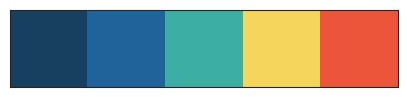

In [22]:
sns.set_style("white")

### Define the colour scheme
c1 = "#173f5f"
c2 = "#20639b"
c3 = "#3caea3"
c4 = "#f6d55c"
c5 = "#ed553b"

custom_palette = [c1, c2, c3, c4, c5]
sns.palplot(sns.color_palette(custom_palette))

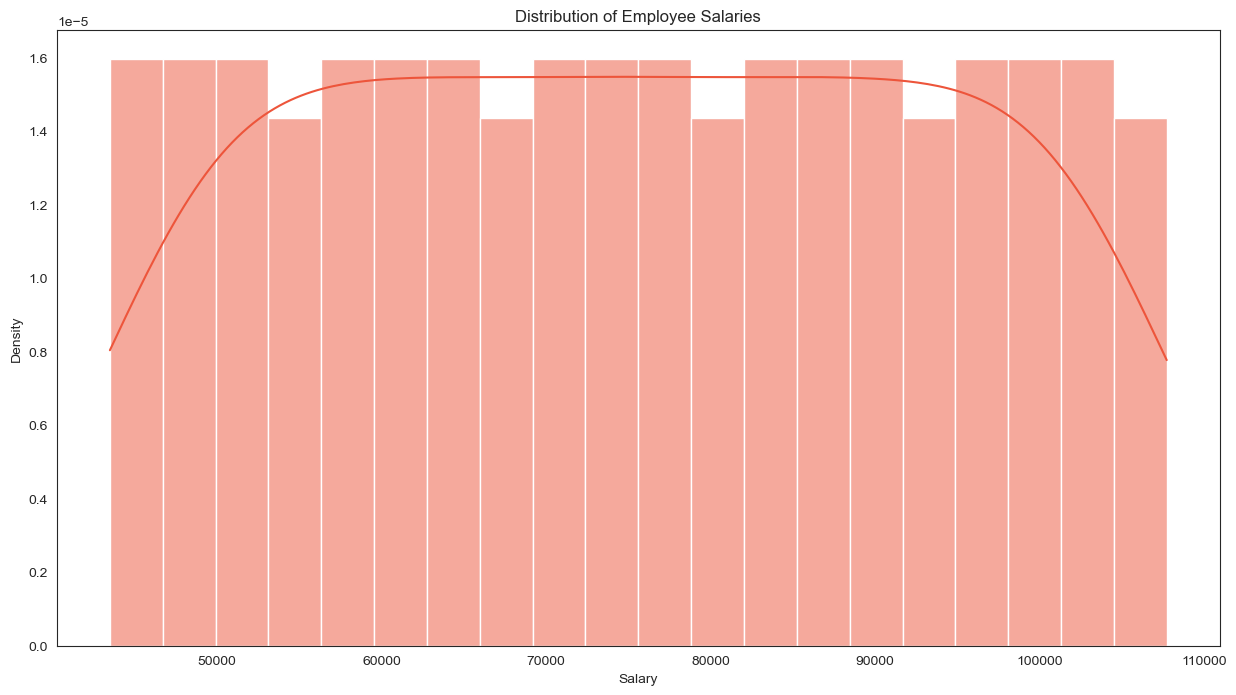

In [23]:
### Plot a histogram and KDE (Kernel Density Estimate)

plt.figure(figsize=(15, 8))
sns.histplot(merged_data['salary'], kde=True, bins=20, color=custom_palette[4], stat='density')
plt.title('Distribution of Employee Salaries')
plt.xlabel('Salary')
plt.ylabel('Density')
plt.show()


######  The density curve closely follows the shape of the histogram, reinforcing the idea of an even distribution across this salary range. 
Notably, there are no visible outliers or extreme values that stand out from the rest of the data. This lack of asymmetry further supports the conclusion that the distribution is quite balanced

##### 8. Bar Plot of Averages

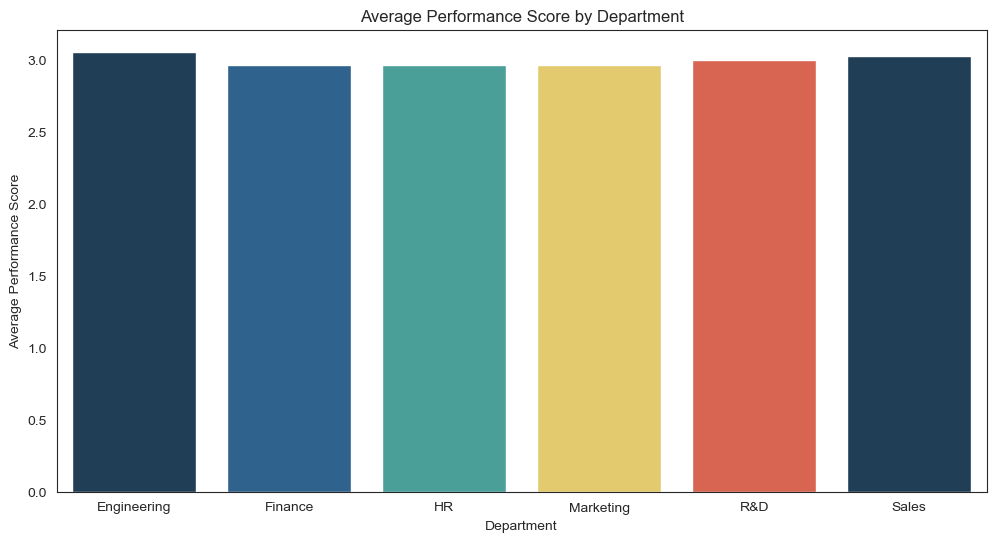

In [24]:
# first we will group the data by department with performance_score avarage
average_performance = merged_data.groupby('department')['performance_score'].mean().reset_index()
##plotting the barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='department', y='performance_score', data=average_performance, palette=custom_palette)

plt.title('Average Performance Score by Department')
plt.xlabel('Department')
plt.ylabel('Average Performance Score')

plt.show()

### 9.Box Plot

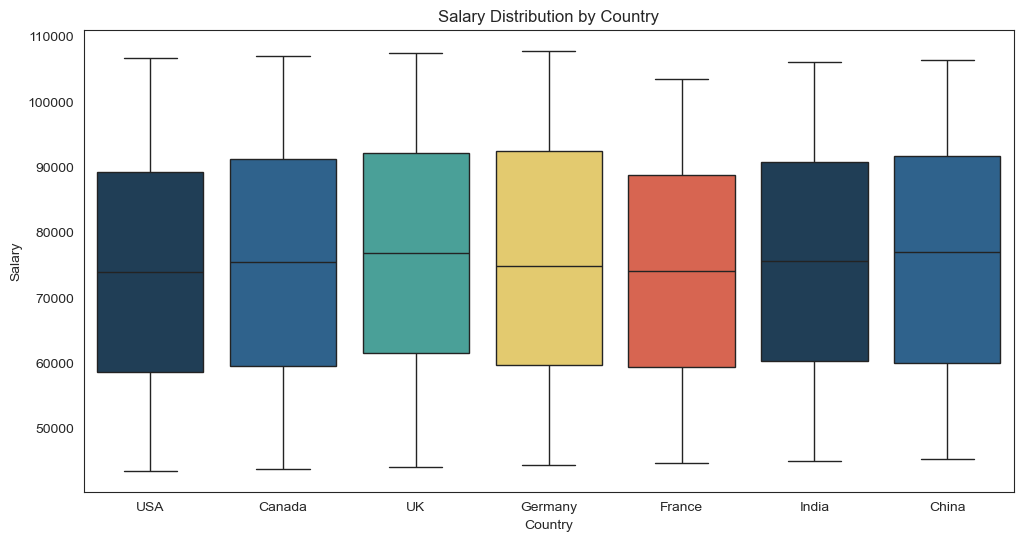

In [25]:
# Box plot grouped by country
plt.figure(figsize=(12, 6))
sns.boxplot(x='country', y='salary', data=merged_data, palette=custom_palette)

plt.title('Salary Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Salary')

plt.show()


###### UK appears to have the largest salary range compared to other countries.

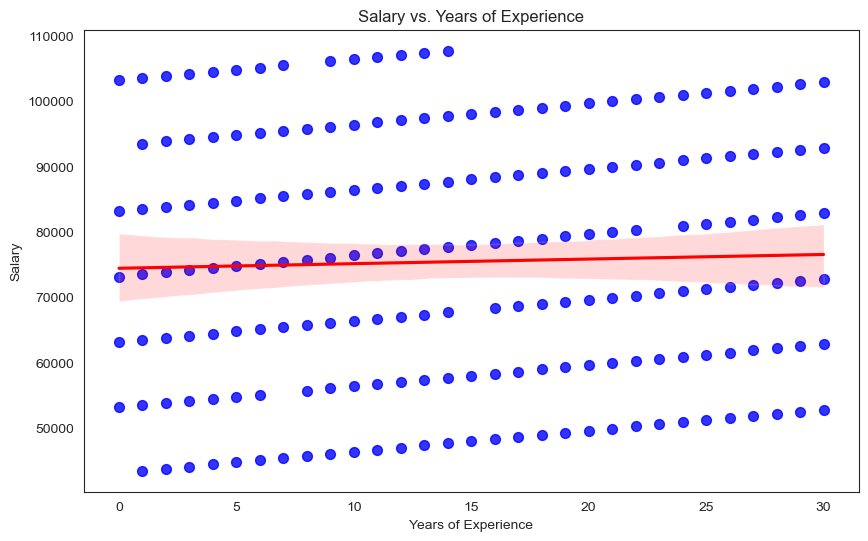

In [26]:
# Create the scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='years_of_experience', y='salary', data=merged_data, scatter_kws={'s': 50, 'color': 'blue'}, line_kws={'color': 'red'})

# Customize the plot
plt.title('Salary vs. Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

# Show the plot
plt.show()


From the scatter plot, the regression line suggests a very weak positive correlation between salary and years of experience. The slope of the regression line is nearly flat, indicating that as years of experience increase, salaries do not increase significantly.